In [45]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


### Import會用到的套件

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.backend import set_session
import tensorflow as tf
import os
def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session

gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)

### 讀取mnist dataset

In [47]:
from keras.datasets import mnist

In [48]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [50]:
#確認train data的大小
x_train.shape

(60000, 28, 28)

cnn正規化很重要我這次只要用 不同Dense大小來達到高的準確率

In [ ]:
# 正規化 - cnn很重要， 我這次只要用 不同Dense大小來達到高的準確率
# x_train = x_train/225
# x_test = x_test/225

In [51]:
x_train = x_train.reshape(60000, 28,28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [97]:
#看看x_train的樣子
#x_train

In [53]:
x_train[9487].shape

(28, 28, 1)

In [54]:
x = x_train[9487][:,:,0]

In [99]:
#看看x的樣子
#x

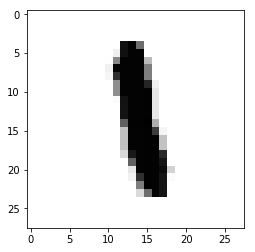

In [56]:
#畫出來資料
plt.imshow(x, cmap = 'Greys')

In [57]:
from keras.utils import np_utils

### 資料前處理

In [58]:
#使用 one hot incoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### import CNN需要用到的套件

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

### 準備要使用的CNN Model - 
不同Dense大小來達到高的準確率

In [60]:
model= Sequential()

In [61]:
model.add(Conv2D(32, (3, 3),padding = 'same', input_shape=(28 ,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer=SGD(lr=0.05), metrics=['accuracy'])

### 看看Model的summary

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

### 開始實驗

In [63]:
my_model = model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0673 - acc: 0.6261: 4s - loss: 0.1586 - acc: 0. - ETA: 3s - loss: 0.1576 - a - ETA: 2s - loss: 0.1482 - acc: 0.2 - ETA: 1s - loss: 0.1354 - acc: - ETA: 1s - loss:
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0057 - acc: 0.9626: 2s - loss: 0.0065 - acc: 0.957 - ETA: 2s - loss: 0.0065 - acc: 0.95 - ETA: 2s - loss: 0.0066 - acc: 0.9 - ETA: 1s - loss: 0.0067 - acc - ETA: 1s - loss: 0.0063 - acc: 0.958 - ETA: 1s - loss: 0.0063 - acc: 0. - ETA: 1s - loss: 0.0061 - acc: 0. - ETA: 0s - loss: 0.0060
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0038 - acc: 0.9755: 1s - loss: 0.0041 - a - ETA: 1s - loss: 0.0039 - acc: 0.97 - ETA: 1s - loss: 0.
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0030 - acc: 0.9811: 2s - loss: 0.0030 - acc: 0.9 - ETA: 2s - loss: 0.0030 - ETA: 1s - loss: 0.003 - ETA: 0s - loss: 0.0030 - 

In [64]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 52us/step


In [82]:
print('資料的 LOSS : ', score[0])
print('資料的 Acurr : ', score[1])

資料的 LOSS :  0.0019015038360221236
資料的 Acurr :  0.9875


###  畫出來看看準確率


<function matplotlib.pyplot.show(*args, **kw)>

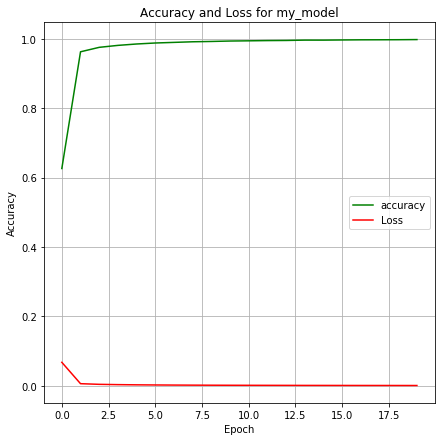

In [73]:
plt.figure(figsize=(7,7))
plt.plot(my_model.history['acc'], 'g')
plt.title('Accuracy and Loss for my_model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(my_model.history['loss'], 'r')
plt.grid()
plt.legend(["accuracy" , "Loss"],loc = 0)
plt.show

### 測驗

In [76]:
predict = model.predict_classes(x_test)

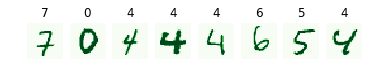

In [94]:
#顯出任何8個抽出來的數字對不對
pick = np.random.randint(1, 9999, 8)

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(x_test[pick[i]].reshape(28, 28), cmap= 'Greens')
    plt.title(predict[pick[i]])
    plt.axis("off")

In [78]:
#用互動的方式測驗看看
from ipywidgets import interact_manual

In [90]:
def testMinist(編號):
    plt.imshow(x_test[編號].reshape(28,28), cmap="GnBu")
    print("我的模型判斷成:", predict[編號])

In [91]:
predict= model.predict_classes(x_test)

interact_manual(testMinist,編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='編號', max=9999), Button(description='Run Interact', st…

<function __main__.testMinist(編號)>